In [84]:
import yfinance as yf
import keras.backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Dropout, BatchNormalization, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSprop
import talib

In [85]:
data=yf.download("0700.hk")

[*********************100%***********************]  1 of 1 completed


In [86]:
df = data
#Create one more column Prediction shifted 15 days up.
df['Prediction'] = data[['Close']].shift(-1)
#print data set
df=df.dropna()
print(df)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2004-06-16    0.875000    0.925000    0.815000    0.830000    0.802119   
2004-06-17    0.830000    0.875000    0.825000    0.845000    0.816615   
2004-06-18    0.840000    0.850000    0.790000    0.805000    0.777959   
2004-06-21    0.820000    0.825000    0.790000    0.800000    0.773127   
2004-06-22    0.800000    0.800000    0.800000    0.800000    0.773127   
...                ...         ...         ...         ...         ...   
2021-12-24  460.799988  460.799988  460.799988  460.799988  460.799988   
2021-12-28  457.799988  459.200012  445.000000  450.399994  450.399994   
2021-12-29  443.600006  445.600006  440.399994  444.799988  444.799988   
2021-12-30  446.399994  450.799988  442.000000  443.399994  443.399994   
2021-12-31  458.000000  458.000000  458.000000  458.000000  458.000000   

                Volume  Prediction  


In [87]:
#Create a data set X and convert it into numpy array , which will be having actual values
X = np.array(df.drop(['Prediction'],1))
# scaler=MinMaxScaler(feature_range=(-1,1))
# X=scaler.fit_transform(X)
#Remove the last 15 rows
x_unseen=X[-100:]
X = X[:-100]
print(X.shape)
# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df['Prediction'])
# Remove Last 15 rows
y_unseen=y[-100:]
y = y[:-100]
print(X)

(4239, 6)
[[8.75000000e-01 9.25000012e-01 8.14999998e-01 8.29999983e-01
  8.02118957e-01 2.19887500e+09]
 [8.29999983e-01 8.75000000e-01 8.24999988e-01 8.45000029e-01
  8.16615224e-01 4.19007500e+08]
 [8.39999974e-01 8.50000024e-01 7.90000021e-01 8.05000007e-01
  7.77958810e-01 1.82990000e+08]
 ...
 [4.35000000e+02 4.69799988e+02 4.34000000e+02 4.56799988e+02
  4.56799988e+02 4.61034780e+07]
 [4.52600006e+02 4.64399994e+02 4.32600006e+02 4.39000000e+02
  4.39000000e+02 5.86259390e+07]
 [4.44799988e+02 4.60399994e+02 4.40000000e+02 4.53600006e+02
  4.53600006e+02 4.29465050e+07]]


/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_77977/893241783.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'],1))


In [88]:
# Split the data into train and test with 90 & 10 % respectively
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

In [89]:
regr=RandomForestRegressor()
regr.fit(x_train,y_train)

RandomForestRegressor()

In [90]:
y_pred=regr.predict(x_test)

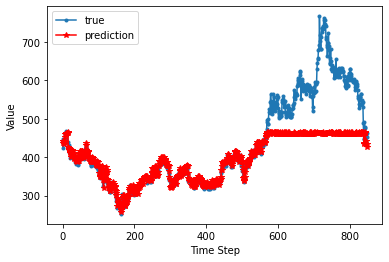

In [91]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [92]:
mean_absolute_percentage_error(y_test,y_pred)

0.0784766008065263

In [93]:
r2_score(y_test,y_pred)

0.5317714846973792

In [94]:
mean_squared_error(y_test,y_pred,squared=False)

79.29870702242869

In [95]:
unseend_pred = regr.predict(x_unseen)

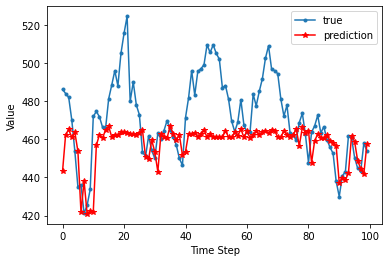

In [96]:
plt.plot(y_unseen, marker='.', label="true")
plt.plot(unseend_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [97]:
mean_absolute_percentage_error(y_unseen,unseend_pred)

0.034855323263928505

In [98]:
r2_score(y_unseen,unseend_pred)

-0.11051982934825144

In [99]:
mean_squared_error(y_test,y_pred)

6288.284935428981